In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
#pio.renderers.default = 'browser'
import plotly.io as pio 
import plotly.graph_objs as gobj
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [2]:
df = pd.read_csv(r'C:\Users\Admin\Downloads\Telegram Desktop\brasil_1 (2).csv')
df1 = pd.read_csv(r'C:\Users\Admin\Downloads\Telegram Desktop\brasil_2.csv')

In [3]:
df.head()

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110.0,"$187,230.85"
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65.0,"$81,133.37"
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211.0,"$154,465.45"
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99.0,"$146,013.20"
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55.0,"$101,416.71"


In [4]:
df1.head()

,property_type,state,region,lat,lon,area_m2,price_brl
0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,414222.98
1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,848408.53
2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,299438.28
3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,848408.53
4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,464129.36


In [5]:
df.place_with_parent_names.value_counts()



place_with_parent_names
|Brasil|Paraná|Londrina|                                  813
|Brasil|Minas Gerais|Belo Horizonte|                      430
|Brasil|Minas Gerais|Belo Horizonte|Buritis|              405
|Brasil|Bahia|Salvador|Pituba|                            315
|Brasil|Bahia|Salvador|                                   314
                                                         ... 
|Brasil|Espírito Santo|Guarapari|Santa Mônica|              1
|Brasil|Espírito Santo|Guarapari|Enseada Azul|              1
|Brasil|Espírito Santo|Vila Velha|Barra do Jucu|            1
|Brasil|Espírito Santo|Vila Velha|Jockey de Itaparica|      1
|Brasil|Pernambuco|Recife|Boa Vista|                        1
Name: count, Length: 565, dtype: int64

In [6]:
df1.state.value_counts()

state
Rio Grande do Sul      3000
Rio de Janeiro         3000
Santa Catarina         3000
São Paulo              3000
Pernambuco              372
Rio Grande do Norte     342
Sergipe                  83
Piauí                    29
Rondônia                  5
Tocantins                 2
Name: count, dtype: int64

In [7]:
df.isnull().sum()

property_type                 0
place_with_parent_names       0
region                        0
lat-lon                    1283
area_m2                       0
price_usd                     0
dtype: int64

In [8]:
df.shape

(12834, 6)

In [9]:
df1.isnull().sum()

property_type       0
state               0
region              0
lat                 0
lon                 0
area_m2          1540
price_brl           0
dtype: int64

In [10]:
df.drop('lat-lon',inplace= True,axis=1)

In [11]:
df.columns

Index(['property_type', 'place_with_parent_names', 'region', 'area_m2',
       'price_usd'],
      dtype='object')

In [12]:
df.isnull().sum()

property_type              0
place_with_parent_names    0
region                     0
area_m2                    0
price_usd                  0
dtype: int64

In [13]:
df.head()

,property_type,place_with_parent_names,region,area_m2,price_usd
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,110.0,"$187,230.85"
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,65.0,"$81,133.37"
2,house,|Brasil|Alagoas|Maceió|,Northeast,211.0,"$154,465.45"
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,99.0,"$146,013.20"
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,55.0,"$101,416.71"


# Creating new columna from place_with_parent_names

In [14]:
df[['Country','state','city','Street']] = df['place_with_parent_names'].str.strip('|').str.split('|', expand=True)

In [15]:
df.drop(['place_with_parent_names','Country','city','Street'], inplace=True,axis=1)

In [16]:
df.head()

,property_type,region,area_m2,price_usd,state
0,apartment,Northeast,110.0,"$187,230.85",Alagoas
1,apartment,Northeast,65.0,"$81,133.37",Alagoas
2,house,Northeast,211.0,"$154,465.45",Alagoas
3,apartment,Northeast,99.0,"$146,013.20",Alagoas
4,apartment,Northeast,55.0,"$101,416.71",Alagoas


In [17]:
df['price_usd'] = np.array(df['price_usd'])

# Removing String Characters from Data

In [18]:
#1USD = 6.19 reais
df['price_usd'] = df['price_usd'].str.replace(r'[$,]','' ,regex=True)

In [19]:
df['price_usd']

0        187230.85
1         81133.37
2        154465.45
3        146013.20
4        101416.71
           ...    
12829    174748.79
12830    115459.02
12831    137302.62
12832    234038.56
12833    168507.77
Name: price_usd, Length: 12834, dtype: object

In [20]:
df['price_usd'] =(df['price_usd']).astype(float)

# 1 US dollar to Brazilian reais

In [21]:
df['price_usd'] = (df['price_usd'] * 6.19)

In [22]:
df['price_usd']

0        1.158959e+06
1        5.022156e+05
2        9.561411e+05
3        9.038217e+05
4        6.277694e+05
             ...     
12829    1.081695e+06
12830    7.146913e+05
12831    8.499032e+05
12832    1.448699e+06
12833    1.043063e+06
Name: price_usd, Length: 12834, dtype: float64

# Checking for Duplicates

In [23]:
df.duplicated().sum()

2183

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df1.duplicated().sum()

307

In [26]:
df1.drop_duplicates(inplace=True)

In [27]:
df.describe()

,area_m2,price_usd
count,10651.000000,1.065100e+04
mean,118.260727,1.139675e+06
std,49.009353,6.051789e+05
min,53.000000,4.635836e+05
25%,78.000000,6.760594e+05
50%,107.000000,9.619360e+05
75%,148.000000,1.426151e+06
max,252.000000,3.245085e+06


In [28]:
 df1.drop(['lat','lon'],axis=1,inplace=True)

In [29]:
df1.columns

Index(['property_type', 'state', 'region', 'area_m2', 'price_brl'], dtype='object')

In [30]:
df= df.rename(columns={'price_usd':'price_brl'})

In [31]:
df.columns

Index(['property_type', 'region', 'area_m2', 'price_brl', 'state'], dtype='object')

In [32]:
newdf= pd.concat([df,df1])

In [33]:
newdf

,property_type,region,area_m2,price_brl,state
0,apartment,Northeast,110.0,1.158959e+06,Alagoas
1,apartment,Northeast,65.0,5.022156e+05,Alagoas
2,house,Northeast,211.0,9.561411e+05,Alagoas
3,apartment,Northeast,99.0,9.038217e+05,Alagoas
4,apartment,Northeast,55.0,6.277694e+05,Alagoas
...,...,...,...,...,...
12828,house,Southeast,250.0,4.291949e+05,São Paulo
12829,apartment,Southeast,55.0,2.523988e+05,São Paulo
12830,apartment,Southeast,57.0,3.194008e+05,São Paulo
12831,house,North,NaN,5.290077e+05,Tocantins


# Checking for null values 

In [34]:
newdf.isnull().sum()

property_type       0
region              0
area_m2          1478
price_brl           0
state               0
dtype: int64

In [35]:
newdf['area_m2'].median()

104.0

Filling null values with median

In [36]:
newdf['area_m2'].fillna(105.0,inplace= True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_20008\3412615638.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [37]:
newdf.isnull().sum()

property_type    0
region           0
area_m2          0
price_brl        0
state            0
dtype: int64

Checking for duplicates and removing duplicates

In [38]:
newdf.duplicated().sum()

993

In [39]:
newdf.drop_duplicates(inplace=True)

In [40]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22184 entries, 0 to 12832
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  22184 non-null  object 
 1   region         22184 non-null  object 
 2   area_m2        22184 non-null  float64
 3   price_brl      22184 non-null  float64
 4   state          22184 non-null  object 
dtypes: float64(2), object(3)
memory usage: 1.0+ MB


In [41]:
newdf.shape

(22184, 5)

In [42]:
newdf.describe()

,area_m2,price_brl
count,22184.000000,2.218400e+04
mean,115.701001,8.929540e+05
std,47.229572,5.426885e+05
min,53.000000,2.395506e+05
25%,78.000000,5.079856e+05
50%,105.000000,7.441541e+05
75%,141.000000,1.147847e+06
max,252.000000,3.245085e+06


# Exploratory Analysis
Distribution of Variables

In [43]:
newdf.columns

Index(['property_type', 'region', 'area_m2', 'price_brl', 'state'], dtype='object')

In [44]:
newdf.property_type.value_counts()

property_type
apartment    17674
house         4510
Name: count, dtype: int64

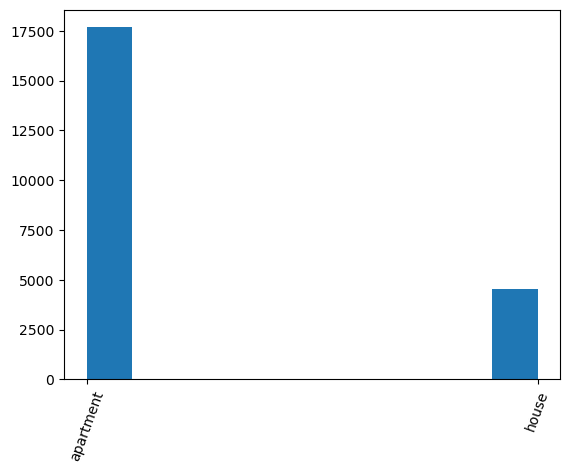

In [45]:
plt.hist(newdf['property_type'])
plt.xticks(rotation= 70)
plt.show()

In [46]:
newdf.region.value_counts()

region
Southeast       8297
South           7696
Northeast       4492
Central-West    1404
North            295
Name: count, dtype: int64

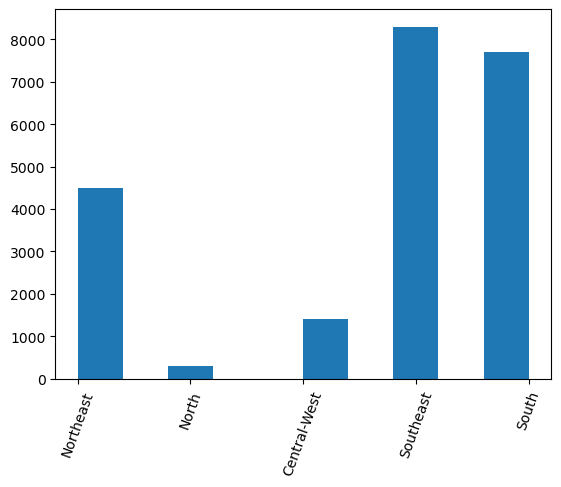

In [47]:
plt.hist(newdf['region'])
plt.xticks(rotation= 70)
plt.show()

In [48]:
newdf.state.value_counts()

state
Rio Grande do Sul      2770
Rio de Janeiro         2709
São Paulo              2685
Santa Catarina         2585
Minas Gerais           2347
Paraná                 2341
Bahia                  1658
Ceará                  1584
Distrito Federal        742
Espírito Santo          556
Goiás                   554
Pernambuco              448
Rio Grande do Norte     317
Pará                    283
Paraíba                 244
Maranhão                102
Mato Grosso              91
Sergipe                  83
Piauí                    29
Alagoas                  27
Mato Grosso do Sul       17
Rondônia                  5
Amazonas                  4
Tocantins                 2
Amapá                     1
Name: count, dtype: int64

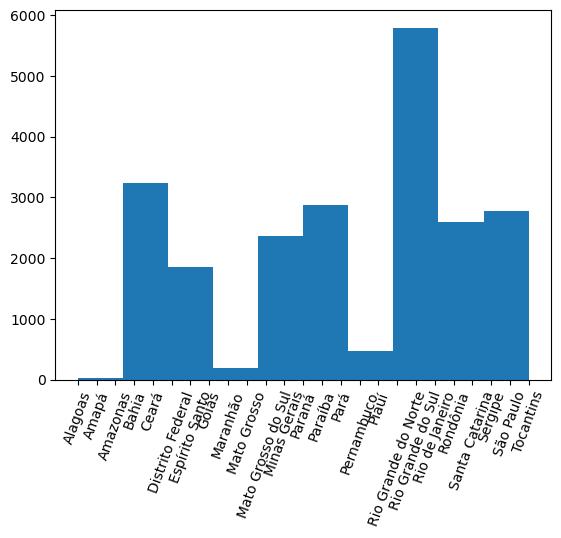

In [49]:
plt.hist(newdf['state'])
plt.xticks(rotation= 70)
plt.show()

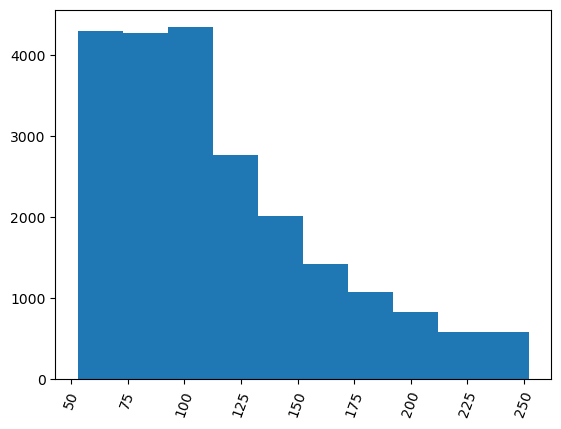

In [50]:
plt.hist(newdf['area_m2'])
plt.xticks(rotation= 70)
plt.show()

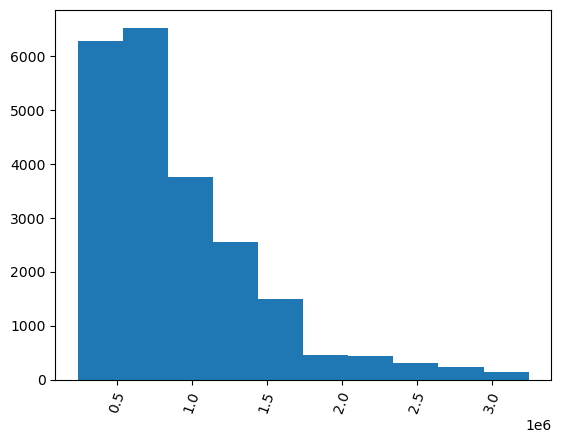

In [51]:
plt.hist(newdf['price_brl'])
plt.xticks(rotation= 70)
plt.show()

# Data Visualization

Region Vs Price

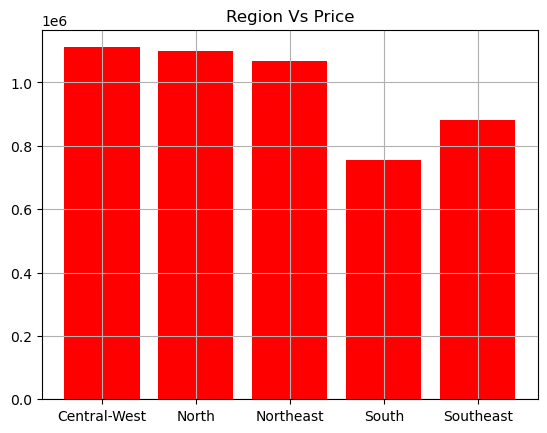

In [56]:
region_price = newdf.groupby('region')['price_brl'].mean()
plt.bar(region_price.index,region_price,color= 'r')
plt.title('Region Vs Price')
plt.grid()
plt.show()

We can tell from visualization that The CENTRAL-WEST region has the hisghest pricing for rent.

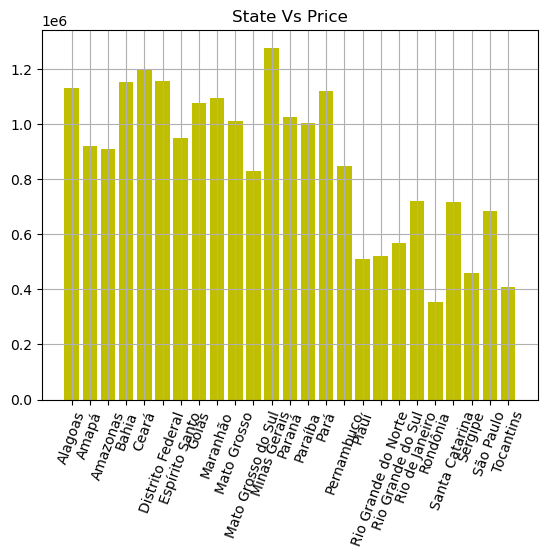

In [58]:
state_price = newdf.groupby('state')['price_brl'].mean()
plt.bar(state_price.index,state_price,color= 'y')
plt.title('State Vs Price')
plt.xticks(rotation= 70)
plt.grid()
plt.show()

From Visualization we can denote that Minas Gerais has the highest house pricing

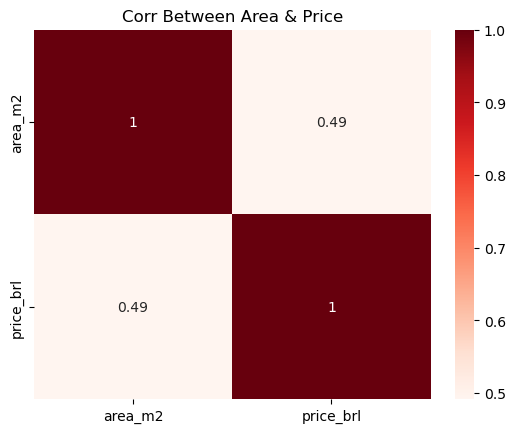

In [59]:
sns.heatmap(newdf[['area_m2','price_brl']].corr(),annot=True,cmap='Reds')
plt.title('Corr Between Area & Price')
plt.show()

There's no strong correlation between Property size on the prices of housing across states in Brasil.

In [60]:
propety_price = newdf.groupby('property_type')['price_brl'].mean()

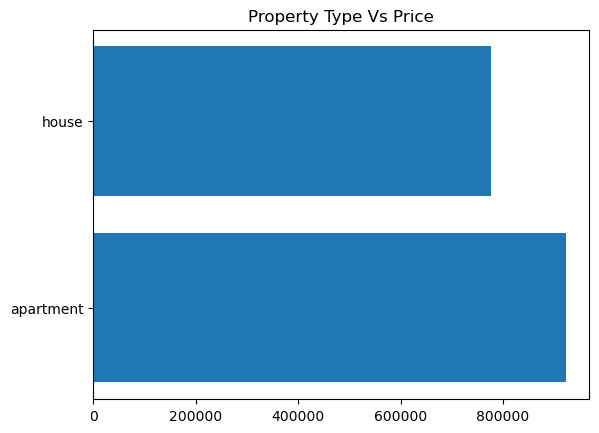

In [61]:
plt.barh(propety_price.index,propety_price)
plt.title('Property Type Vs Price')
plt.show()

In [62]:
propety_area = newdf.groupby('property_type')['area_m2'].mean()

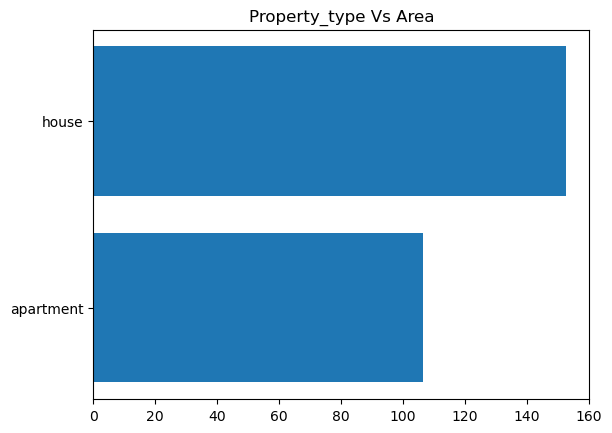

In [63]:
plt.barh(propety_area.index,propety_area)
plt.title('Property_type Vs Area')
plt.show()

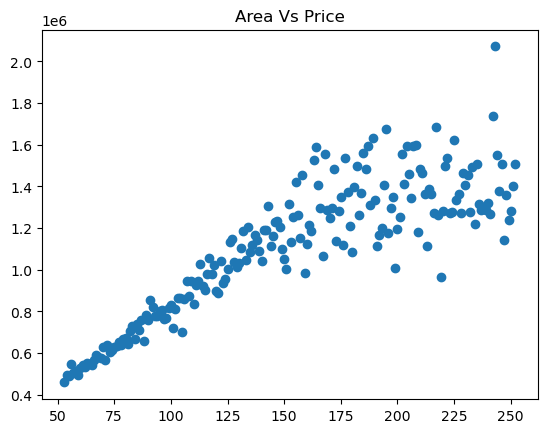

In [64]:
area_price = newdf.groupby('area_m2')['price_brl'].mean()
plt.scatter(area_price.index, area_price)
plt.title('Area Vs Price')
plt.show()